<a href="https://colab.research.google.com/github/shannonmels/cs2215/blob/main/Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS2215 - Data Analytics for DH 2

*Shannon Mels - CS2215*

## Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism and I agree to the
requirements set out thereby in relation to plagiarism and referencing. I confirm that I
have referenced and acknowledged properly all sources used in preparation of this
assignment.
I declare that this assignment is entirely my own work based on my personal study. I
further declare that I have not engaged the services of another to either assist me in, or
complete this assignment”</font>



# Part 1 - Dataset Load - Social Media Engagement
The Social Media Engagement database contains information on 1000 posts from the platforms Twitter, Facebook, and Instagram. I picked this dataset becuase I am interested in analyzing the behaviour of users on social media. For each post, the dataset includes the following variables:

* post_id
* platform (Twitter, Facebook, or Instagram)
* post_type (Format)
* post_time (Date and time)
* caption
* hashtags
* likes
* comments
* shares
* caption_length
* num_hashtags
* post_hour
* post_day
* sentiment_score (Positive, negative, or neutral)

These variables can provide insights into which factors significantly influence post-engagement levels, and when users are most active on social media.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/shannonmels/cs2215/refs/heads/main/social_media_engagement.csv')

The dataset contains 14 different variables, both numerical and categorical, of

1.   List item
2.   List item

1000 posts.


In [ ]:
print(df.shape)
print('\n',df.dtypes)

(1000, 14)

 post_id             int64
platform           object
post_type          object
post_time          object
caption            object
hashtags           object
likes               int64
comments            int64
shares              int64
caption_length      int64
num_hashtags        int64
post_hour           int64
post_day           object
sentiment_score    object
dtype: object


## Part 2 - Line Plot
I want to investigate during which hours of the day users are most active on social media.


<Axes: title={'center': 'Amount of total engagement each hour of the day'}, xlabel='Hour of the day', ylabel='Sum of likes, shares, and comments'>

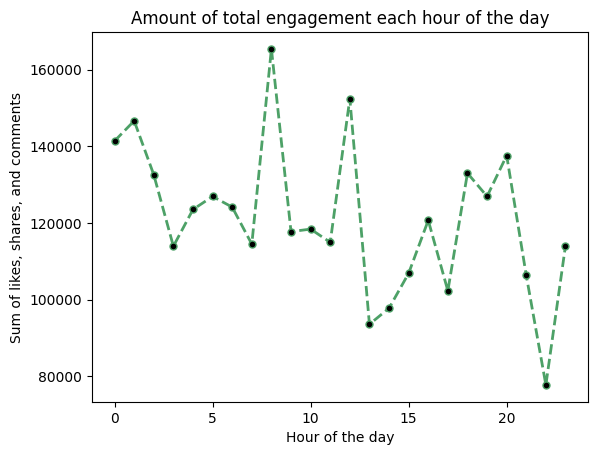

In [ ]:
df['engagement'] = df['likes'] + df['comments'] + df['shares']
df.groupby('post_hour')['engagement'].sum().plot.line(title="Amount of total engagement each hour of the day",
                                                      ylabel = 'Sum of likes, shares, and comments',
                                                      xlabel = 'Hour of the day',
                                                      color = (77/255, 161/255, 103/255,1),
                                                      linewidth = '2',
                                                      linestyle = 'dashed',
                                                      marker = 'o',
                                                      markersize = '5',
                                                      markerfacecolor = 'black')

There are significant peaks around 8 AM and 12 PM, meaning that all posts together get more likes, comments, and shares around these times and users are therefore more active. It suggests that when people wake up/ start their work, they are active on their social media for the day and probably also check in during lunch break. From 4 PM till 8 PM, the engagement also increases, perhaps because people have finished their work/ school. There is also a significant low point at 10 PM, possibly due to people going off their phones at the end of the day. However, as activity immediately rises again after 10 PM, this last analysis could be questioned.

## Part 3 - Bar Plot
I want to analyse the frequency of different types of engagement (likes, shares, comments) that occur on average per post on different platforms Twitter, Facebook, and Instagram.

<Axes: title={'center': 'Average engagement per post on different platforms'}, xlabel='Platform', ylabel='Average engagement'>

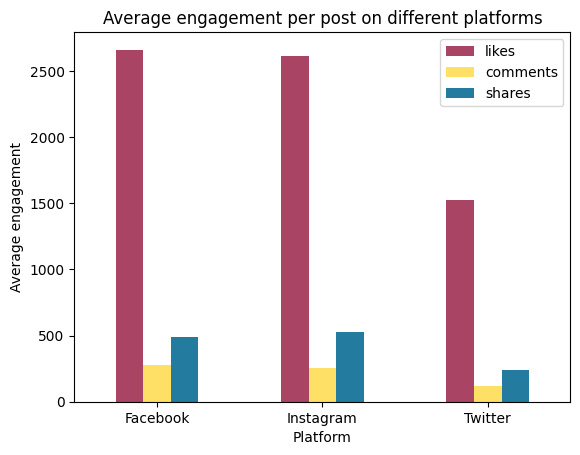

In [ ]:
df.groupby('platform')[['likes','comments','shares']].mean().plot.bar(title='Average engagement per post on different platforms',
                                                                      xlabel='Platform',
                                                                      ylabel='Average engagement',
                                                                      color=[(170/255, 68/255, 101/255,1),(255/255, 224/255, 102/255,1),(36/255, 123/255, 160/255,1)],
                                                                      rot=0)

While Facebook and Instagram have a similar average engagement per post, Twitter has significantly lower engagement. This could have multiple causes, one of which is the audience. While Facebook and Instagram are often used to share personal updates with friends and family (who are more likely to engage with posts), Twitter is more often used to share thoughts and opinions with a broader audience of strangers (who might be less likely to interact with posts.)

On all platforms, 'likes' are the most common form of engagement, followed by 'shares', while 'comments' are the least frequent. The distribution of these forms of engagement is similar across all platforms. This can likely be attributed to the fact that liking a post is significantly the easiest on all platforms (a single click), while sharing takes a little more effort (multiple clicks, and a decision on the recipient), and commenting demands the most effort (various clicks, and thoughtful input).


# Part 4 - Dataset Load - Travel Trips
The Traveler Trip database contains information of over a 100 travelers from all over the world. I choose this dataset because I am interested in seeing how factors like age, gender, and destination influence travel preferences and behavior. For each traveler, the dataset includes the following variables:

* Trip ID
* Destination
* Start date
* End date
* Duration (days)
* Traveler name
* Traveler age
* Traveler gender
* Traveler nationality
* Accommodation type
* Accommodation cost
* Transportation type
* Transportation cost

These variables can provide insights into which factors significantly influence travel preferences, and how demographics like age, gender, and country of origin affect travelers' choices.




In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/shannonmels/cs2215/refs/heads/main/Travel%20details%20dataset%20(1).csv')

The dataset contains 13 different variables, both numerical and categorical, of 139 different travelers.

In [ ]:
print(df.shape)
print('\n',df.dtypes)

(139, 13)

 Trip ID                   int64
Destination              object
Start date               object
End date                 object
Duration (days)         float64
Traveler name            object
Traveler age            float64
Traveler gender          object
Traveler nationality     object
Accommodation type       object
Accommodation cost       object
Transportation type      object
Transportation cost      object
dtype: object


## Part 5 - Pie Plot
I want to investigate what accommodation type travelers prefer to stay in.

<Axes: title={'center': 'Choice of accommodation type'}>

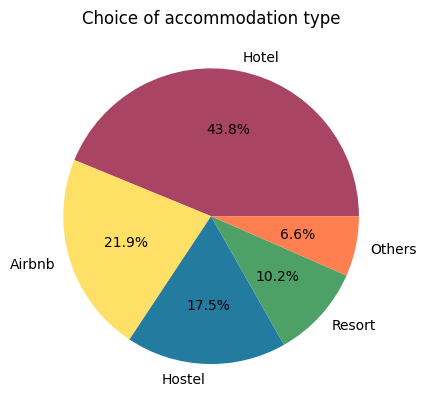

In [ ]:
df_accommodation = df['Accommodation type'].value_counts().sort_values(ascending = False)
df_top_accommodation = df_accommodation.iloc[:4]
df_top_accommodation.loc["Others"] = df_accommodation.sum() - df_top_accommodation.sum()

df_top_accommodation.plot.pie(autopct='%1.1f%%',
                              ylabel = "", title = "Choice of accommodation type",
                              colors = [(170/255, 68/255, 101/255,1),(255/255, 224/255, 102/255,1),(36/255, 123/255, 160/255,1),(77/255, 161/255, 103/255,1),(255/255, 127/255, 81/255, 1)])

Nearly half of all travelers choose to stay in hotels (43.8%), making that the most popular choice of accommodation. It is probably a common choice because of its convenience, dependability and luxuries, including room service and housekeeping. Airbnb was chosen by 21.9% of travelers, making it the second most popular choice. This might be due to its affordable rates and nice atmosphere. Another common choice was hostels (17.5%), most likely attracting backpackers and tourists on a budget. Although resorts provide luxury, they were a less popular choice, potentially due to their higher prices. Not many travelers choose to stay at alternative accommodation types, as the 'Other' portion is the smallest.

## Part 6 - Histogram Plot
I want to investigate people of which age are most likely to travel.


<Axes: title={'center': 'Amount of travelers per age'}, xlabel='Traveler Age', ylabel='Count'>

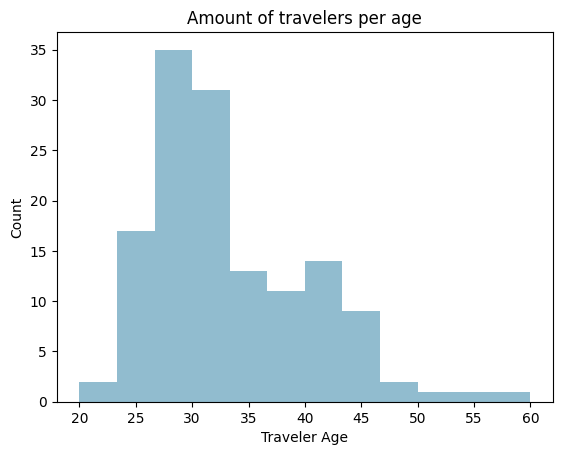

In [ ]:
df['Traveler age'].plot.hist(title='Amount of travelers per age',
                             xlabel='Traveler Age',
                             ylabel='Number of travellers',
                             bins=12,
                             alpha=0.5,
                             color=(36/255, 123/255, 160/255,1))

Most travelers are around the ages of 25 to 35. This is probably because people of this age range often have the money, in contrast to younger people, and still have a lot of free time. After the age of 35, the amount of travelers declines. Work obligations and family responsibilities could be causing this change. There is an even further drop after the age of 50, possibly because of changing interests.